<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Final Project: Data 602**


# Abstract:
In this project, I have used an IMDb movie dataset containing different movie features such as movie title, genre, release year, rating, run time, gross earning, director and actor names. After collecting the data, I have performed exploratory and visualizing data analysis techniques to find out the answers of the following research questions: Which is the most successful movie genre in the dataset? Is the movie that grosses the most also the most popular among viewers? Does the movie with the most popular actor also have the highest grossing? Which year had the longest run time of movies? What are the top 10 movies based on rating frequency?
 
It is noted, the dataset was a dirty dataset. Therefore, I have performed proper data clean up along with proper data structuring works before conducting the analyses and I have used manly Pandas and Matplotlib libraries for the analyses. The analysis begins by investigating the most successful movie genre in the dataset. By examining the gross earning for each genre, I have identified that the genre which is generating the highest revenue.

Next, I have explored the relationship between the movie’s gross earnings and its popularity among viewers considering movie rating feature as the base of the movie’s popularity. By analyzing this relationship, I have found that the movie that has most gross earning is not the most rated or the popular movie. 
Furthermore, the research examines whether the movie with highest gross earning is influenced by the presence of the most popular actor. Here, I have found that the movie with the most popular actor is not generating the highest grossing.  

Additionally, by analyzing the runtime values across different years, I have determined the year in which movies tended to have longer durations.
Finally, I have identified the top 10 movies based on rating frequency. By counting the occurrence of ratings for each movie, I have determined which movies received the highest number of ratings, indicating their popularity among viewers.
Overall, this research project has provided the insights into various aspects of the movie industry, including the success of different genres, the relationship between gross earnings and popularity, the influence of popular actors, runtime, and movie ratings. I believe, the findings have provided a deeper understanding of the factors that contribute to a movie's success and viewers' preferences.














# Introduction:
The initial source of the dataset for this project is kaggle.com [https://www.kaggle.com/datasets/bharatnatraymovies-dataset-for-feature-extracion-prediction] and later,I have stored the data on my GitHub [https://github.com/Raji030/data602_project_data/blob/main/movies.csv]. The dataset contains 9,999 observations for 9 variables. Each variable represent a movie feature. 

I have chosen this dataset because I am a great consumer of movies. I always find it interesting to understand the consumers' culture and the factors that drive a movie towards success.I am also curious about the difference between the viewer popularity and total gross. 

______________
# EDA:
In this part, I have created a dataframe and explored the data for Summary statistics means, medians, quartiles, missing value information
any other relevant information about the dataset. From the initial inspection, it is seen that the dataset contains 9,999 rows and 9 columns. The columns include information such as the movie title, year of release, genre, duration, rating, director, actors, and gross income. There are also missing values in the year, genre, rating,votes, run time and gross columns. In this dataset, the target variable is not clearly defined. We could potentially use the gross income as a proxy for success and explore its distribution along with other movie features' exploratory data analysis and visualization. Moreover, the mean of the movie rating is 6.92 and the standard deviation of the movie rating is 1.22. Moreover, the mean of the movie run time is 68.69 minutes and the standard deviation of the movie run time is 47.26 minutes.   



# Import dataset:


In [363]:
import pandas as pd
url="https://raw.githubusercontent.com/Raji030/data602_project_data/main/movies.csv"
df=pd.read_csv(url)
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


# Summary Statistics:

In [364]:
df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


# Missing Value Information:

In [365]:
missing_values = df.isnull().sum()
print(missing_values)

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64


# Other Relevant Information:
Other relevant information include rows and columns number, data type for each column, and the columns' names.

In [366]:
df.shape

(9999, 9)

In [367]:
df.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

In [368]:
df.columns.tolist()

['MOVIES',
 'YEAR',
 'GENRE',
 'RATING',
 'ONE-LINE',
 'STARS',
 'VOTES',
 'RunTime',
 'Gross']

# Data Wrangling:
In this part, I have done all the necessary data tyding, cleaning, structuring and other relevant works to prepare the dataset for the analyses. All the necessary wotks are done given below one after another. 

# 1.Create Subset:

In [369]:
# Subset,df1 of dataframe by dropping 5th column i.e. ONE-LINE column
df1 = df.drop(df.columns[[4]], axis=1)
df1.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


# 2. Modify Multiple Column Names:

In [370]:
df1 = df1.rename(columns={'MOVIES':'movies', 'YEAR':'year','GENRE':'genre', 'RATING':'rating', 'STARS':'stars', 'VOTES':'votes', 'RunTime':'runtime', 'Gross':'gross'})
df1.head()

,movies,year,genre,rating,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN



# 3. Convert different variables' data type into correct structure i.e. from non-numeric to numeric data type:

In [371]:
# Extract only single year in year column
df1['year'] = df1['year'].str.extract(r'(\d{4})')

# Convert year column to numeric data type
df1['year'] = pd.to_numeric(df1['year'])

# Remove commas from votes column
df1['votes'] = df1['votes'].replace(',', '', regex=True)

# Convert votes column to numeric data type
df1['votes'] = pd.to_numeric(df1['votes'])

# Extract numeric value in gross column
df1['gross'] = df1['gross'].str.extract('(\d+\.\d+|\d+)')

# Convert gross column to numeric
df1['gross'] = pd.to_numeric(df1['gross'])

# Check data types 
print(df1.dtypes)
df1.head()


movies      object
year       float64
genre       object
rating     float64
stars       object
votes      float64
runtime    float64
gross      float64
dtype: object


,movies,year,genre,rating,stars,votes,runtime,gross
0,Blood Red Sky,2021.0,"\nAction, Horror, Thriller",6.1,\n Director:\nPeter Thorwarth\n| \n Star...,21062.0,121.0,NaN
1,Masters of the Universe: Revelation,2021.0,"\nAnimation, Action, Adventure",5.0,"\n \n Stars:\nChris Wood, \nSara...",17870.0,25.0,NaN
2,The Walking Dead,2010.0,"\nDrama, Horror, Thriller",8.2,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN
3,Rick and Morty,2013.0,"\nAnimation, Adventure, Comedy",9.2,"\n \n Stars:\nJustin Roiland, \n...",414849.0,23.0,NaN
4,Army of Thieves,2021.0,"\nAction, Crime, Horror",NaN,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


# 4. Fix missing and invalid values in data:

In [372]:
# Fill missing values with mean in rating, votes and runtime columns
df1['rating'].fillna(df1['rating'].mean(), inplace=True)
df1['votes'].fillna(df1['votes'].mean(), inplace=True)
df1['runtime'].fillna(df1['runtime'].mean(), inplace=True)

# Replace invalid values i.e. remove dollar signs and commas from the 'gross' column
df1['gross'] = df1['gross'].replace({'\$': '', ',': ''}, regex=True)
#df1['gross'].fillna(df1['gross'].mean(), inplace=True)

# Drop missing values in year and gross columns
df1.dropna(subset=['year', 'gross'], inplace=True)

# Drop duplicates
df1.drop_duplicates(inplace=True)
df1.head()

# Check if any missing value is still present
missing_values1 = df1.isnull().sum()
print(missing_values1)

movies     0
year       0
genre      0
rating     0
stars      0
votes      0
runtime    0
gross      0
dtype: int64


# 5. Data cleaning for genre column

In [373]:
df1['genre'] = df1['genre'].str.strip()  # Remove leading and trailing whitespace
df1['genre'] = df1['genre'].str.split(',')  # Split multiple genres
df1 = df1.explode('genre')  # Expand multiple genres into separate rows
df1['genre'] = df1['genre'].str.lower()  # Convert genre values to lowercase
df1.head()

,movies,year,genre,rating,stars,votes,runtime,gross
77,The Hitman's Bodyguard,2017.0,action,6.9,\n Director:\nPatrick Hughes\n| \n Stars...,205979.0,118.0,75.47
77,The Hitman's Bodyguard,2017.0,comedy,6.9,\n Director:\nPatrick Hughes\n| \n Stars...,205979.0,118.0,75.47
77,The Hitman's Bodyguard,2017.0,crime,6.9,\n Director:\nPatrick Hughes\n| \n Stars...,205979.0,118.0,75.47
85,Jurassic Park,1993.0,action,8.1,\n Director:\nSteven Spielberg\n| \n Sta...,897444.0,127.0,402.45
85,Jurassic Park,1993.0,adventure,8.1,\n Director:\nSteven Spielberg\n| \n Sta...,897444.0,127.0,402.45


# 6.Data cleaning for stars column:

In [374]:
# Extract actor names from the stars column
#df1['actor'] = df1['stars'].str.split('\n|').str[1].str.strip()

df1['actor'] = df1['stars'].apply(lambda x: str(x).split("Star")[-1])
df1['actor'] = df1['actor'].str.replace("\n", "").str.replace("s:", "")
df1['actor'] = df1['actor'].str.lower()  # Convert actor names to lowercase

df1.head()
#print(df1['actor'])

,movies,year,genre,rating,stars,votes,runtime,gross,actor
77,The Hitman's Bodyguard,2017.0,action,6.9,\n Director:\nPatrick Hughes\n| \n Stars...,205979.0,118.0,75.47,"ryan reynolds, samuel l. jackson, gary oldman,..."
77,The Hitman's Bodyguard,2017.0,comedy,6.9,\n Director:\nPatrick Hughes\n| \n Stars...,205979.0,118.0,75.47,"ryan reynolds, samuel l. jackson, gary oldman,..."
77,The Hitman's Bodyguard,2017.0,crime,6.9,\n Director:\nPatrick Hughes\n| \n Stars...,205979.0,118.0,75.47,"ryan reynolds, samuel l. jackson, gary oldman,..."
85,Jurassic Park,1993.0,action,8.1,\n Director:\nSteven Spielberg\n| \n Sta...,897444.0,127.0,402.45,"sam neill, laura dern, jeff goldblum, richard ..."
85,Jurassic Park,1993.0,adventure,8.1,\n Director:\nSteven Spielberg\n| \n Sta...,897444.0,127.0,402.45,"sam neill, laura dern, jeff goldblum, richard ..."


# 7. Create new columns based on existing columns or calculations:

In [375]:
# Create a new column 'year_release' by converting year column to integer type 
df1['year_release'] = df1['year'].astype(int)

# Create new column named gross_earning 
df1['gross_earning'] = df1['gross']
df1.head()

,movies,year,genre,rating,stars,votes,runtime,gross,actor,year_release,gross_earning
77,The Hitman's Bodyguard,2017.0,action,6.9,\n Director:\nPatrick Hughes\n| \n Stars...,205979.0,118.0,75.47,"ryan reynolds, samuel l. jackson, gary oldman,...",2017,75.47
77,The Hitman's Bodyguard,2017.0,comedy,6.9,\n Director:\nPatrick Hughes\n| \n Stars...,205979.0,118.0,75.47,"ryan reynolds, samuel l. jackson, gary oldman,...",2017,75.47
77,The Hitman's Bodyguard,2017.0,crime,6.9,\n Director:\nPatrick Hughes\n| \n Stars...,205979.0,118.0,75.47,"ryan reynolds, samuel l. jackson, gary oldman,...",2017,75.47
85,Jurassic Park,1993.0,action,8.1,\n Director:\nSteven Spielberg\n| \n Sta...,897444.0,127.0,402.45,"sam neill, laura dern, jeff goldblum, richard ...",1993,402.45
85,Jurassic Park,1993.0,adventure,8.1,\n Director:\nSteven Spielberg\n| \n Sta...,897444.0,127.0,402.45,"sam neill, laura dern, jeff goldblum, richard ...",1993,402.45


# 8. Drop unnecessary column(s) from dataset:

In [376]:
# Drop year and gross columns
df1 = df1.drop(["year","stars","gross"], axis=1)
df1.head()

,movies,genre,rating,votes,runtime,actor,year_release,gross_earning
77,The Hitman's Bodyguard,action,6.9,205979.0,118.0,"ryan reynolds, samuel l. jackson, gary oldman,...",2017,75.47
77,The Hitman's Bodyguard,comedy,6.9,205979.0,118.0,"ryan reynolds, samuel l. jackson, gary oldman,...",2017,75.47
77,The Hitman's Bodyguard,crime,6.9,205979.0,118.0,"ryan reynolds, samuel l. jackson, gary oldman,...",2017,75.47
85,Jurassic Park,action,8.1,897444.0,127.0,"sam neill, laura dern, jeff goldblum, richard ...",1993,402.45
85,Jurassic Park,adventure,8.1,897444.0,127.0,"sam neill, laura dern, jeff goldblum, richard ...",1993,402.45


# 9. Drop row(s) with zero value from dataset:

In [377]:
# Check if any column has a zero value
if (df1 == 0).any(axis=0).any():
    print("At least one column has a zero value")
else:
    print("No column has a zero value")

# Drop rows containing at least one zero value in any column
df1 = df1[~(df1==0).any(axis=1)]

# Check again if any column has a zero value
if (df1 == 0).any(axis=0).any():
    print("At least one column has a zero value")
else:
    print("No column has a zero value")

df1.head()

At least one column has a zero value
No column has a zero value


,movies,genre,rating,votes,runtime,actor,year_release,gross_earning
77,The Hitman's Bodyguard,action,6.9,205979.0,118.0,"ryan reynolds, samuel l. jackson, gary oldman,...",2017,75.47
77,The Hitman's Bodyguard,comedy,6.9,205979.0,118.0,"ryan reynolds, samuel l. jackson, gary oldman,...",2017,75.47
77,The Hitman's Bodyguard,crime,6.9,205979.0,118.0,"ryan reynolds, samuel l. jackson, gary oldman,...",2017,75.47
85,Jurassic Park,action,8.1,897444.0,127.0,"sam neill, laura dern, jeff goldblum, richard ...",1993,402.45
85,Jurassic Park,adventure,8.1,897444.0,127.0,"sam neill, laura dern, jeff goldblum, richard ...",1993,402.45


# 10. Convert all the string values to upper or lower cases in one column:

In [378]:
# Convert 'movies' column to lowercase:
df1['movies'] = df1['movies'].str.lower()
df1.head()

<ipython-input-378-238fdf399d99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['movies'] = df1['movies'].str.lower()


,movies,genre,rating,votes,runtime,actor,year_release,gross_earning
77,the hitman's bodyguard,action,6.9,205979.0,118.0,"ryan reynolds, samuel l. jackson, gary oldman,...",2017,75.47
77,the hitman's bodyguard,comedy,6.9,205979.0,118.0,"ryan reynolds, samuel l. jackson, gary oldman,...",2017,75.47
77,the hitman's bodyguard,crime,6.9,205979.0,118.0,"ryan reynolds, samuel l. jackson, gary oldman,...",2017,75.47
85,jurassic park,action,8.1,897444.0,127.0,"sam neill, laura dern, jeff goldblum, richard ...",1993,402.45
85,jurassic park,adventure,8.1,897444.0,127.0,"sam neill, laura dern, jeff goldblum, richard ...",1993,402.45


# Data Analysis:
In this part I have determined all the answers regarding the research questions set previously. 

1. Here, I have determined out the most successful movie genre based gross earning

In [379]:
# Calculate total gross earning for each genre
genre_earning = df1.groupby('genre')['gross_earning'].sum().reset_index()
genre_earning.head()

# Sort genres by their total gross income in descending order
sorted_genres = genre_earning.sort_values('gross_earning', ascending=False)
sorted_genres.head()

# Get most successful movie genre with top gross
most_successful_genre = sorted_genres['genre'].iloc[0]

print("The most successful movie genre based on gross earning is:", most_successful_genre)

The most successful movie genre based on gross earning is:  adventure


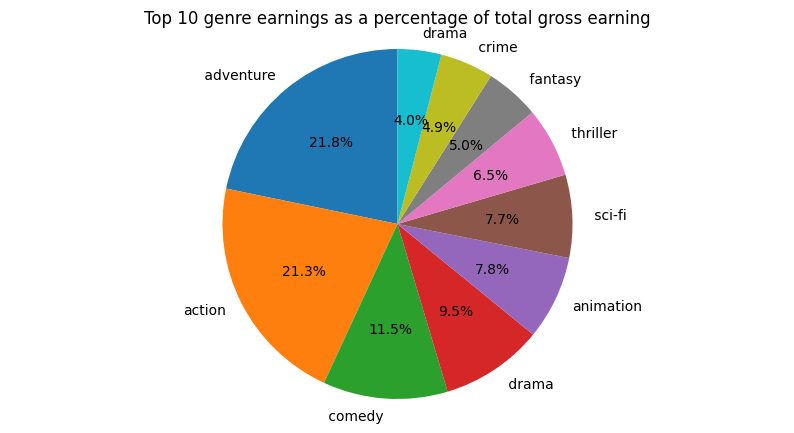

In [380]:
# Select top 10 genres with the highest gross earnings
top10_genres = sorted_genres.head(10)

# Calculate total gross earning for the top 10 genres
top10_genre_earnings = top10_genres['gross_earning']

# Calculate the percentage of gross earnings for each genre
genre_percentage = (top10_genre_earnings / top10_genre_earnings.sum()) * 100

# Get genre names
genre_names = top10_genres['genre']

# Plot pie chart
plt.figure(figsize=(10, 5))
plt.pie(genre_percentage, labels=genre_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Top 10 genre earnings as a percentage of total gross earning')
plt.show()

2. Here, I have determined if the movie that grosses most also the most popular among viewers

In [381]:
# Find movie with highest gross earning
highest_gross_movie = df1[df1['gross_earning'] == df1['gross_earning'].max()]

# Check if movie with highest gross earning is also most popular
most_popular_movie = highest_gross_movie['rating'].iloc[0]

print("The movie with highest gross earning is:", highest_gross_movie['movies'].iloc[0])
print("The popularity of the movie with highest gross earning is:", most_popular_movie)

# Find maximum rating value
max_rating = df1['rating'].max()
print("The maximum rating value is:", max_rating)

# Filter dataframe to get movie with the maximum rating
max_rating_movie = df1[df1['rating'] == max_rating]['movies'].iloc[0]
print("The movie with the maximum rating is:", max_rating_movie)

The movie with highest gross earning is: beauty and the beast
The popularity of the movie with highest gross earning is: 7.1
The maximum rating value is: 8.9
The movie with the maximum rating is: the lord of the rings: the return of the king


3. Here, I have found out if the movie with the most popular actor also have the highest grossing?

The most popular actor is: liam neeson


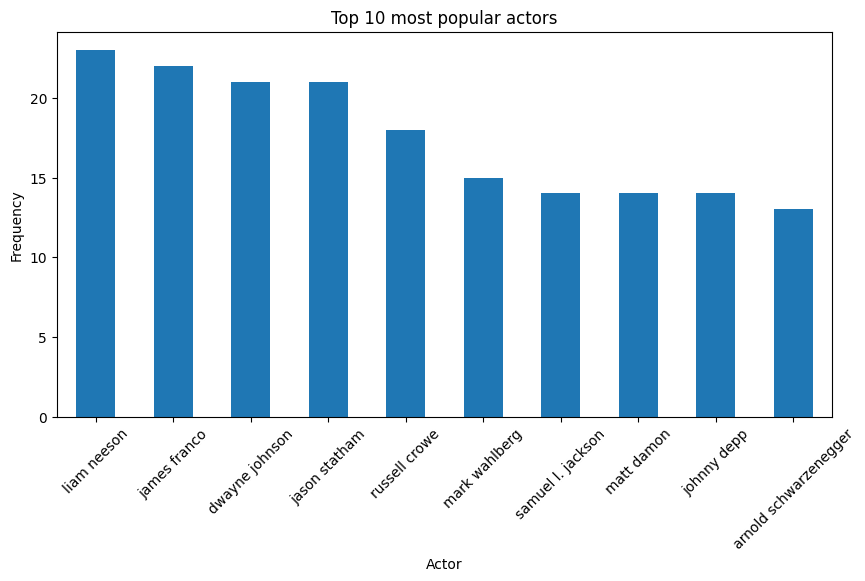

In [382]:
import matplotlib.pyplot as plt

# Split actor column to get actor separately
df1['actor'] = df1['actor'].str.split(', ')

# Create a list for all actor names
all_actors = [actor for actors_list in df1['actor'] for actor in actors_list]

# Count frequency of each actor
actor_counts = pd.Series(all_actors).value_counts()

# Get most popular actor
most_popular_actor = actor_counts.idxmax()

print("The most popular actor is:", most_popular_actor)

# Plot the most popular actors
top_actors = actor_counts.head(10)  # Select top 10 actors
top_actors.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 most popular actors')
plt.xlabel('Actor')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



The actor with the highest gross earning is: dwayne johnson


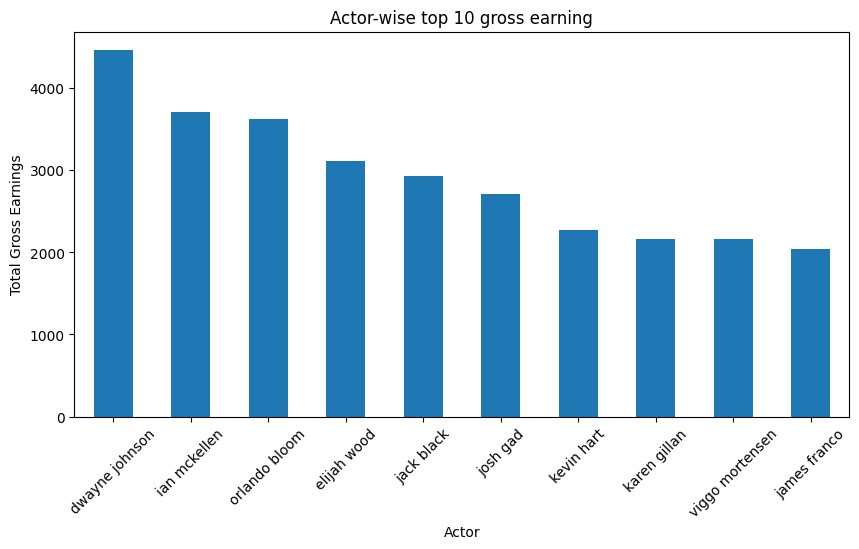

In [383]:

# Flat list of actors into individual rows
df1 = df1.explode('actor')

# Group by actor and calculate sum of gross earning
actor_earnings = df1.groupby('actor')['gross_earning'].sum()

# Find actor with highest gross earning
actor_highest_earning = actor_earnings.idxmax()

print("The actor with the highest gross earning is:", actor_highest_earning)

# Sort the top 10 gross earnings in descending order
sorted_earning = actor_earnings.sort_values(ascending=False).head(10)

# Plot the actor-wise top 10 gross earnings
plt.figure(figsize=(10, 5))
sorted_earning.plot(kind='bar')
plt.xlabel('Actor')
plt.ylabel('Total Gross Earnings')
plt.title('Actor-wise top 10 gross earning')
plt.xticks(rotation=45)
plt.show()

So, in this dataset though Liam neesan is the most popular actor but his moive's gross earning is not the highest. Rather, Dwane Johnson's movies have the highest gross earning.

4. Here, I have found out the year which had the longest run time of movies?

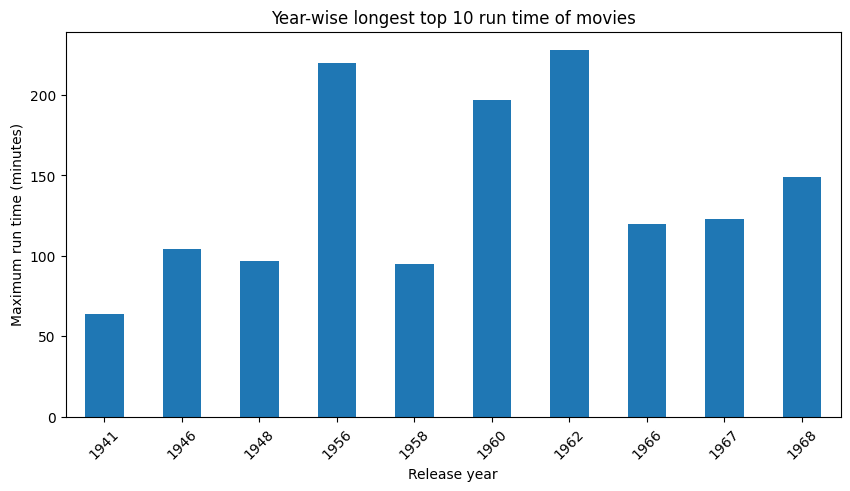

In [384]:
# Convert release_year column to datetime
df1['year_release'] = pd.to_datetime(df1['year_release'], format='%Y')

# Group by release year and calculate maximum run time 
year_max_runtime = df1.groupby(df1['year_release'].dt.year)['runtime'].max()

# Plot year-wise longest top 10 run time
top10=year_max_runtime.head(10)
plt.figure(figsize=(10, 5))
top10.plot(kind='bar')
plt.xlabel('Release year')
plt.ylabel('Maximum run time (minutes)')
plt.title('Year-wise longest top 10 run time of movies')
plt.xticks(rotation=45)
plt.show()

So, it is seen that the release year 1962 had the longest run time of movies.

5. Here, I have found out the top 10 movies based on rating frequency.

['beauty and the beast', '101 dalmatians', 'a cinderella story', 'a man apart', 'a man for all seasons', 'a united kingdom', 'aala kaf ifrit', 'adult beginners', 'after tiller', 'al midan']


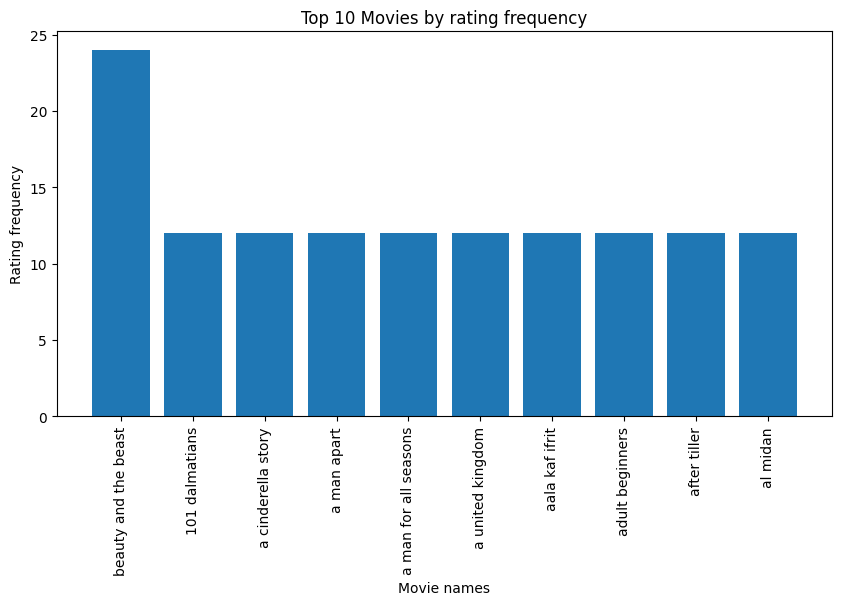

In [385]:
# Get top 10 movies based on rating frequency
top_10_movies = df1.groupby('movies')['rating'].count().nlargest(10)

# Get names of top 10 movies
top_10_movie_names = top_10_movies.index.tolist()
print(top_10_movie_names)

# Plot top 10 movies based on rating frequency using a bar plot
plt.figure(figsize=(10, 5))
plt.bar(top_10_movie_names, top_10_movies)
plt.xlabel('Movie names')
plt.ylabel('Rating frequency')
plt.title('Top 10 Movies by rating frequency')
plt.xticks(rotation=90)
plt.show()


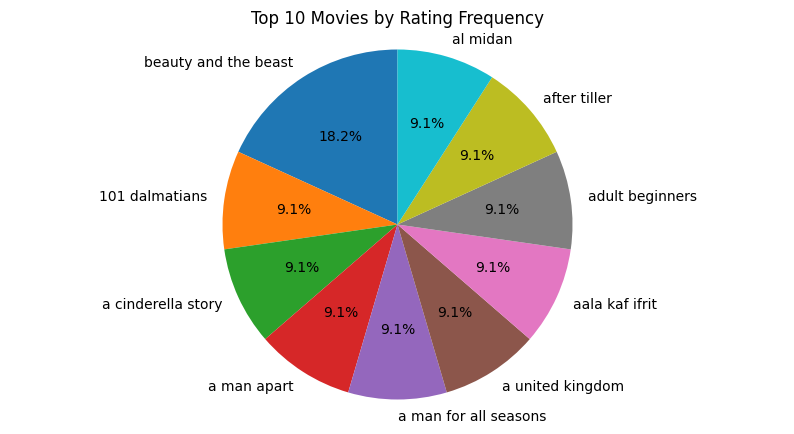

In [386]:
# Plot top 10 movies based on rating frequency using a pie chart
plt.figure(figsize=(10, 5))
plt.pie(top_10_movies, labels=top_10_movie_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Top 10 Movies by Rating Frequency')
plt.show()

# Conclusion: 
After analyzing the data, it is found that the most successful movie genre based on gross earning is "adventure". Additionally, the movie that grosses most is not the most popular movie among viewers. Here, the movie found with highest gross earning is 'beauty and the beast' whose rating is 7.1, whereas the movie named "the lord of the rings: the return of the king" found a rating of 8.9 with a lower gross. It is also found that the movie with most popular actor does not have the highest grossing. Although the actor Liam Neesam found the most popular actor but the highest grossing movie with the actor, Dwayne Johnson. The longest run time of movies happend in year 1962 and the top 10 movies based on rating frequency are 'beauty and the beast', '101 dalmatians', 'a cinderella story', 'a man apart', 'a man for all seasons', 'a united kingdom', 'aala kaf ifrit', 'adult beginners', 'after tiller', and 'al midan'. Among these top 10 rated movies, "beauty and the beast" has the most rating frequency of 18.2 by percentage and all other 9 movies have the equal percetage of 9.1% each. 

An important thing to notice that, usually movies with the most popular actors receive the highest gross. But in this analysis, I have found a different result. I think this has happened because I considered the actor with the highest frequency i.e. the actor with the maximum count as the most popular actor. This measure of popularity is based solely on the count of movies an actor appeared in and does not take into account audience ratings or other relevant factors. In conclusion, a movie's success cannot be solely determined by financial earnings or the presence of popular actors. A combination of factors, including genre, rating, and run time of movies, contribute to a movie's overall success.

